In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100
gamma = 0.2

Preparing for a Measured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.156 Seconds
Building LP ...
	Done. Took 0.128 Seconds
Building M ...
	Done. Took 0.185 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 7.722
	Done. Took 1.404 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2): -4.848*(0.961)^t + 6.565*(0.934)^t + -3.464*(0.342)^t + -5.352*(0.765)^t + 5.801*(0.581)^t + -0.002*(0.235)^t + 1.300964 * delta(t,0)
		RMSE = 0.185
		Matlab: [-4.85  0.96  6.56  0.93 -3.46  0.34 -5.35  0.77  5.8   0.58 -0.    0.23]
	Done. Took 71.563 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3): 7.313*(0.014)^t + -0.233*(0.109)^t + 4.442*(0.014)^t + 1.325*(0.743)^t + 0.863*(0.010)^t + -1.595*(0.672)^t + -12.114198 * delta(t,0)
		RMSE = 0.037
		Matlab: [ 7.31  0.01 -0.23  0.11  4.44  0.01  1.32  0.74  0.86  0.01 -1.59  0.67]
	Done. Took 86.208 Seconds
Learning Conv

{0: {1: array([-4.85,  0.96,  6.56,  0.93, -3.46,  0.34, -5.35,  0.77,  5.8 ,  0.58, -0.  ,  0.23]),
  2: array([ 7.31,  0.01, -0.23,  0.11,  4.44,  0.01,  1.32,  0.74,  0.86,  0.01, -1.59,  0.67])},
 1: {0: array([ 3.01, -0.27, -0.79, -0.36,  0.1 , -0.67, -0.65, -0.33, -0.96, -0.24,  4.46,  0.01]),
  2: array([-0.46, -0.12, -0.71,  0.09, -1.63,  0.04, -0.05, -0.18,  0.22, -0.38, -1.81, -0.08])},
 2: {0: array([ 3.01,  0.6 , -7.78,  0.16, -5.46,  0.53,  5.98,  0.12, -4.11,  0.23,  8.01,  0.32]),
  1: array([-10.  ,   0.87,   1.2 ,   0.25,  -4.92,   0.33,   0.83,   0.03,  10.  ,   0.94,   4.16,   0.18])}}

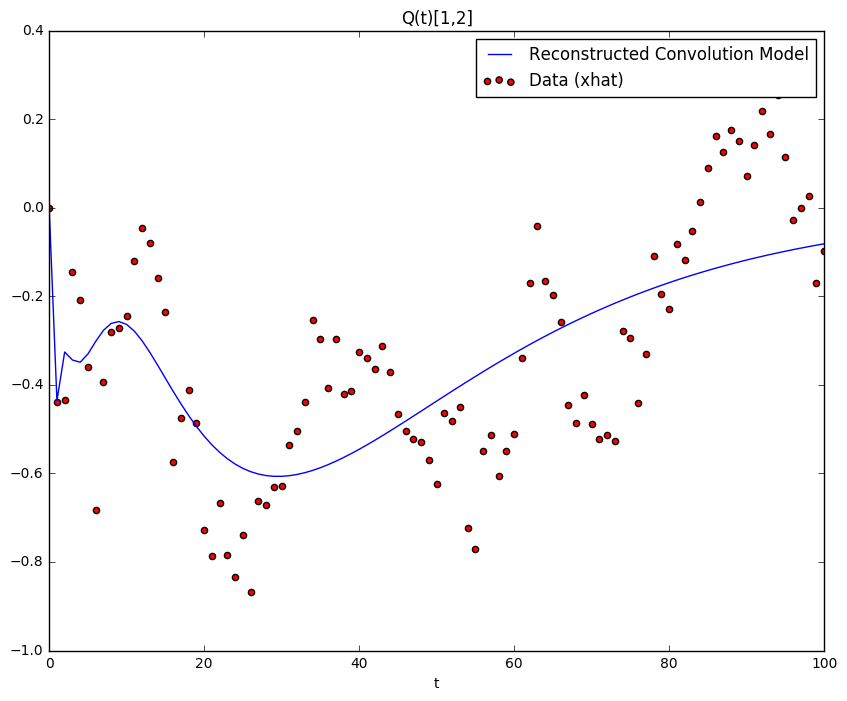

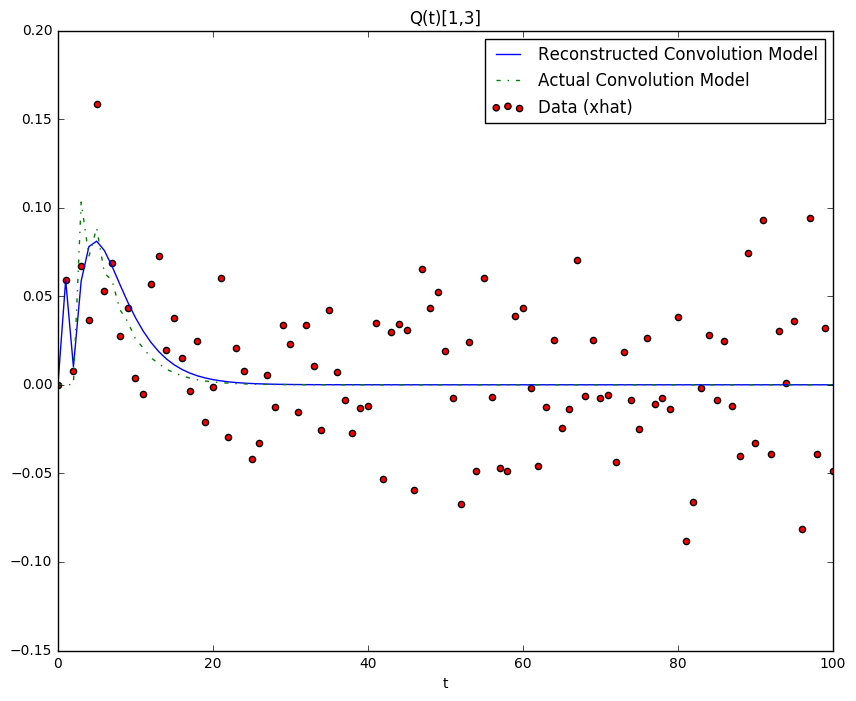

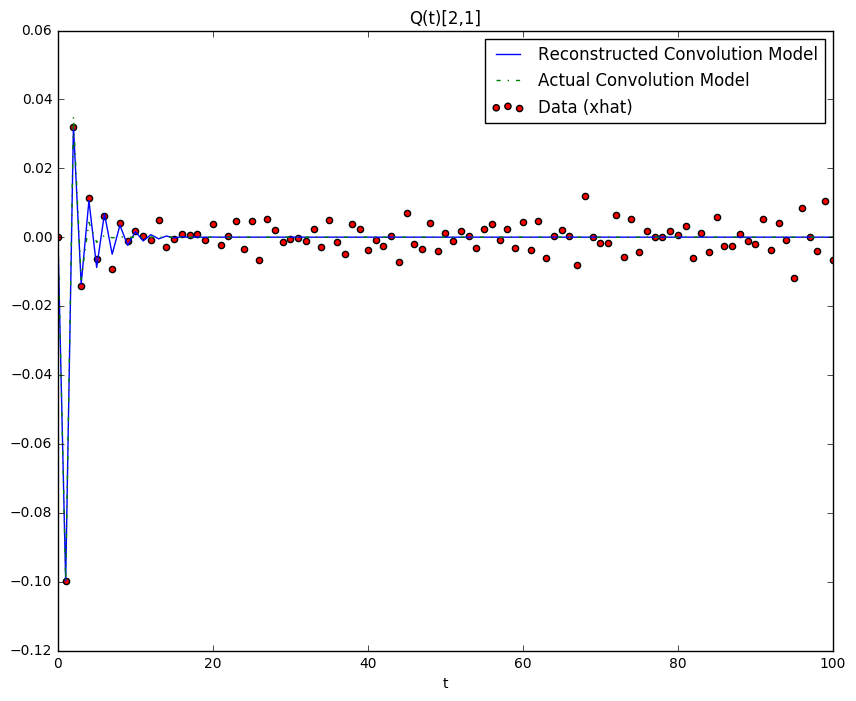

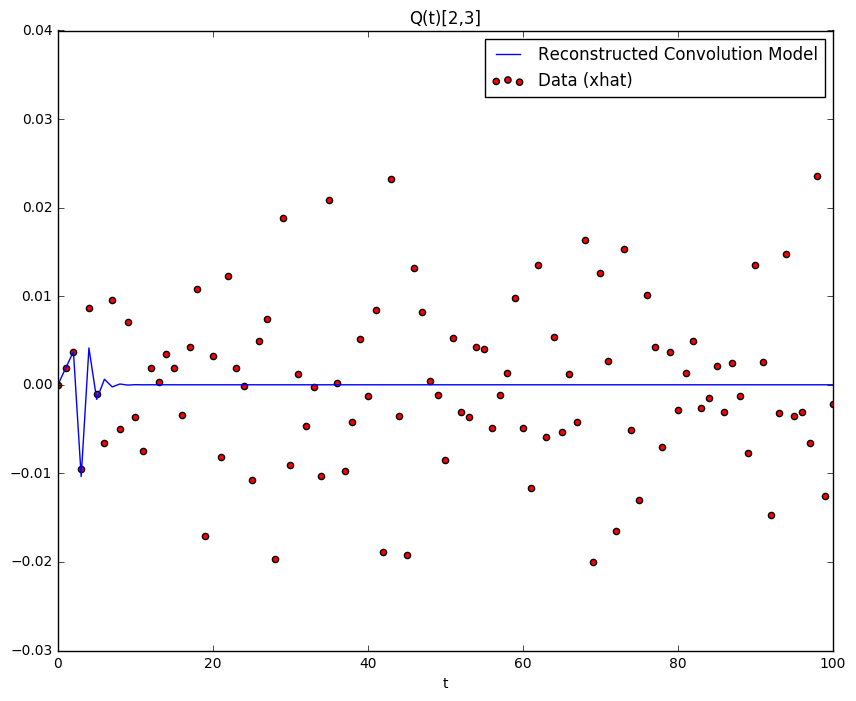

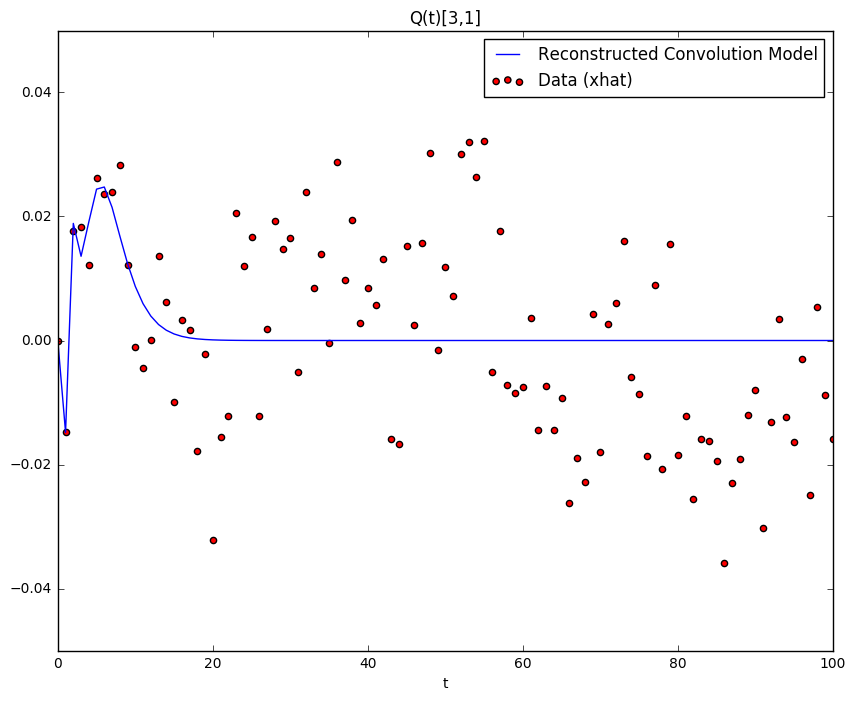

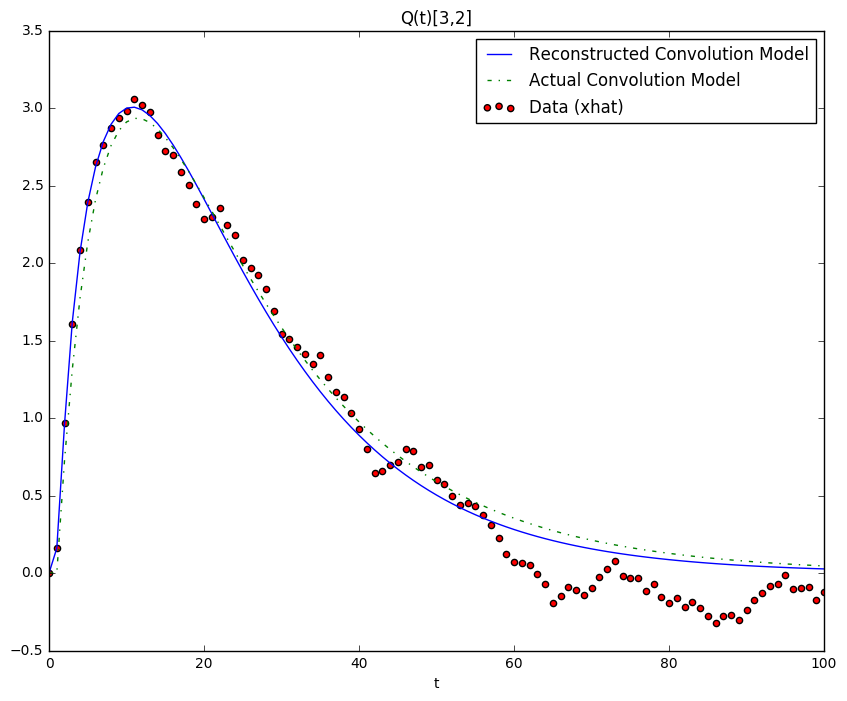

In [2]:
%matplotlib inline
A = [
    [0.75, 0, 0, 0, 0, 1.2],
    [-.1, -.35, 0, 0, 0, 0],
    [0, 0, .85, -1, 0, 0],
    [0, -.73, 0, .95, 0, 0],
    [0, 0, .43, 0, -.6, 0],
    [0, 0, 0, 0, .2, .55]

]
A = np.array(A)
B = [
    [1.4, 0, 0],
    [0, -.25, 0],
    [0, 0, 0.75],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)

# u = pd.read_csv('../scripts/u.csv', header=None).values
u = np.random.rand(R * 6 + 1, 3) * 2 - 1
y = ss_sim(A, B, C, u)

Pbool = np.identity(3)

real_params = {
    (1, 3): [.51, .75, -.11, -.6, -.816, .55],
    (2, 1): [.286, -.35],
    (3, 2): [7.684, .95, -8.588, .85]
}

recon = Reconstructor(debug=True, r=R, Pbool=Pbool, max_iterations=1000, bounds=10, order=6, real_params=real_params, robust=False)
recon.measured(y, u + np.random.randn(u.shape[0], u.shape[1]) * gamma, plot=True)  #, ij=(1,3))